In [20]:
### Python et Data Science :

import pandas as pd #Manipulation Base de donnees
import sklearn.datasets as d
# http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [21]:
#Chargement exceptionnel.
d.load_iris().keys()
c=d.load_iris(return_X_y=True)
col_name={0:'setosa', 1:'versicolor', 2:'virginica'}
iris=pd.DataFrame(c[0],columns=['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])
iris['target']=c[1]

In [22]:
iris.sample(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
8,4.4,2.9,1.4,0.2,0
42,4.4,3.2,1.3,0.2,0
34,4.9,3.1,1.5,0.1,0
71,6.1,2.8,4.0,1.3,1


In [23]:
iris.to_csv('iris.csv',index=False) #Sauvegarde du dataset dans un fichier iris.csv

In [24]:
import matplotlib.pyplot as plt # Affichage de donnees

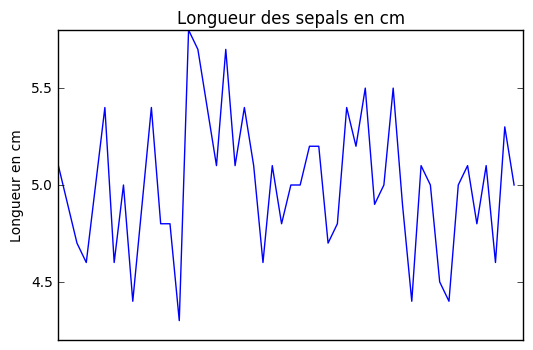

In [25]:
plt.plot(iris[iris.target==0]['sepal length (cm)'])
plt.title('Longueur des sepals en cm')
plt.ylabel('Longueur en cm')
#plt.xlabel('') pas de titre des abscisse
plt.xticks([]) # On enleve les index car il n'y a pas d'interet
plt.show()

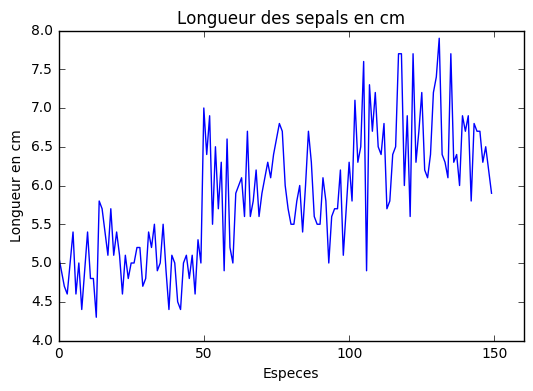

In [26]:
plt.plot(iris['sepal length (cm)'])
plt.title('Longueur des sepals en cm')
plt.ylabel('Longueur en cm')
plt.xlabel('Especes') 
plt.xticks([0,50,100,150]) # On enleve les index car il n'y a pas d'interet
plt.show()
plt.show()

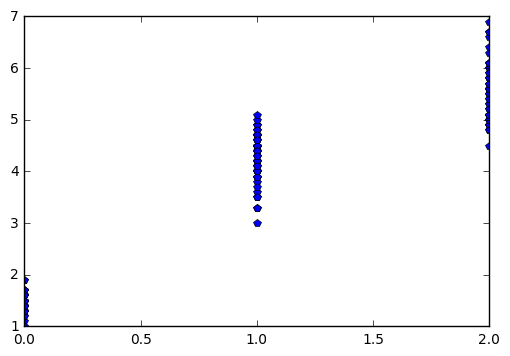

In [27]:
####
# Etude univarie
####
plt.plot(iris['target'],iris['petal length (cm)'],'bp')
plt.show()

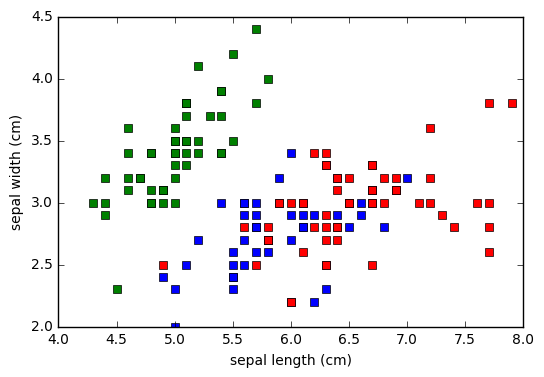

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)
# red dashes, blue squares and green triangles
plt.plot(iris[iris.target==0]['sepal length (cm)'],
         iris[iris.target==0]['sepal width (cm)'],
         'gs',
         iris[iris.target==1]['sepal length (cm)'],
         iris[iris.target==1]['sepal width (cm)'], 
         'bs',
         iris[iris.target==2]['sepal length (cm)'],
         iris[iris.target==2]['sepal width (cm)'],
         'rs')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

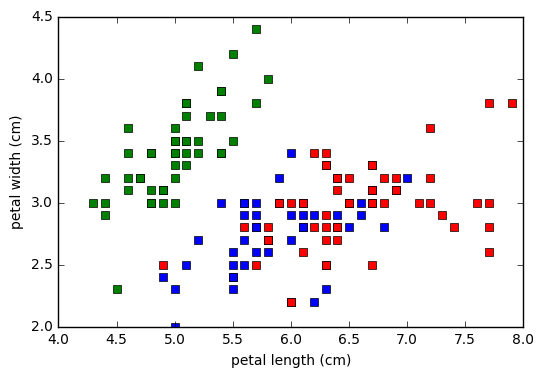

In [29]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(iris[iris.target==0]['sepal length (cm)'],
         iris[iris.target==0]['sepal width (cm)'],
         'gs',
         iris[iris.target==1]['sepal length (cm)'],
         iris[iris.target==1]['sepal width (cm)'], 
         'bs',
         iris[iris.target==2]['sepal length (cm)'],
         iris[iris.target==2]['sepal width (cm)'],
         'rs')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

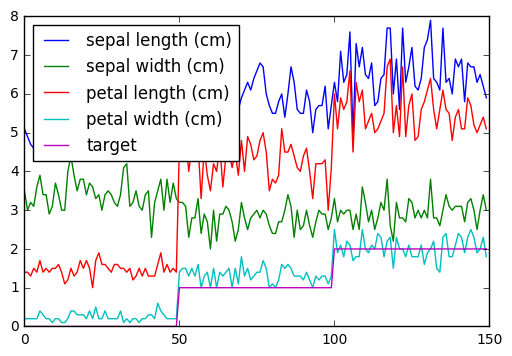

In [30]:
iris.plot(xticks=[0,50,100,150])
plt.show()

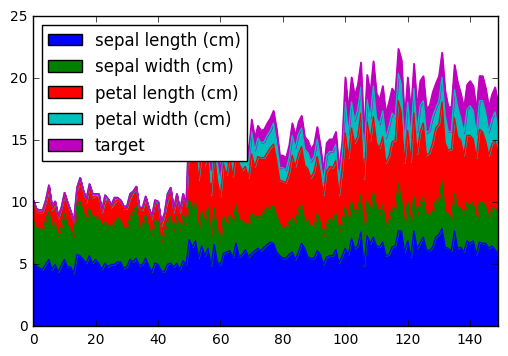

In [31]:
iris.plot.area(stacked=True )
plt.show()

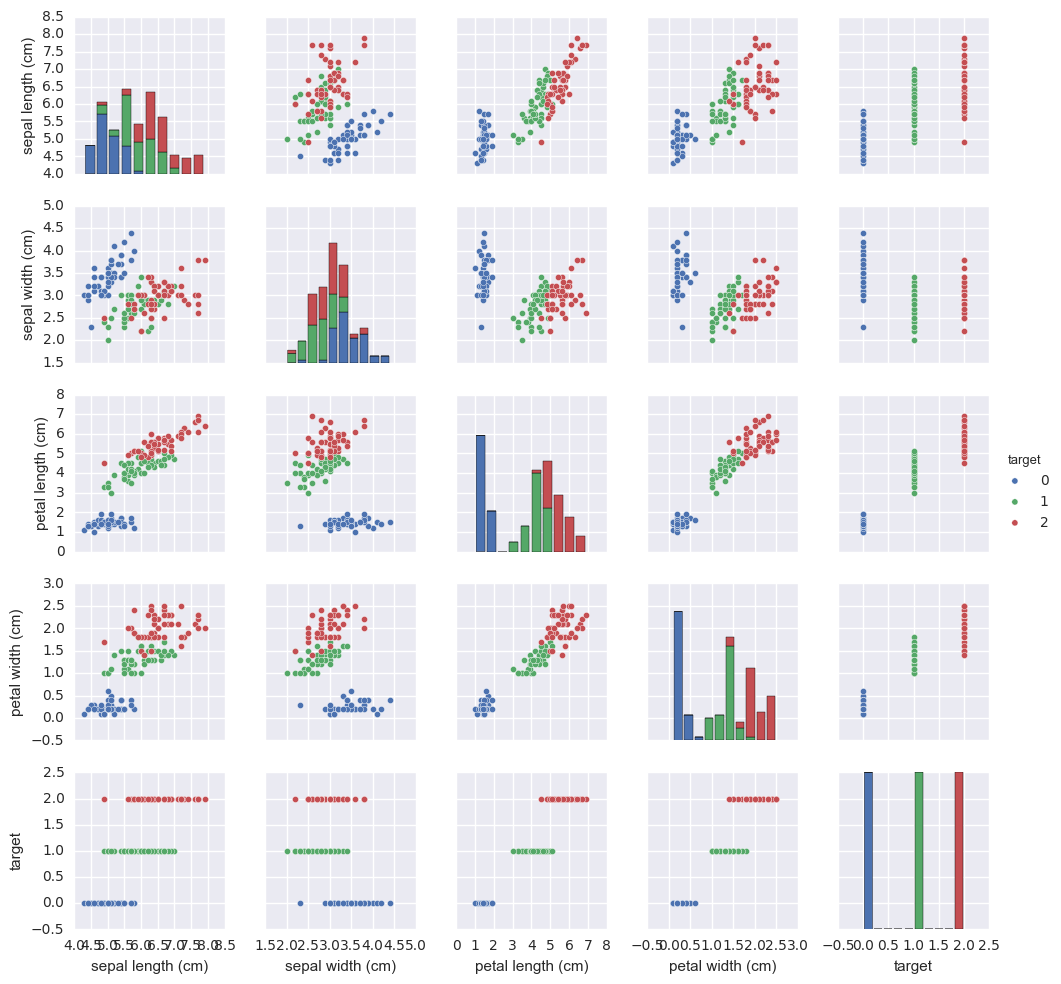

In [32]:
import seaborn as sns
#bonne librairie de visualisation
sns.pairplot(iris, hue="target", size=2)
plt.show()

# A toi de Jouer  !! 

Utilise le dataset train.csv du mail, puis, fais une analyse similaire.

In [33]:
import pandas as pd

In [34]:
df=pd.read_csv('train.csv',index_col='PassengerId')

In [35]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
len(df) #combien de ligne la base a

891

## Commandes python pour nettoyer les données



In [37]:
df.Age.fillna(25,inplace=True) # Ici je remplace toutes les valeurs manquante de la variables Age par 25
# l'argument inplace=True sert a modifier la base de donnée. Tu peux essayer sans, tu optiendra une copie de la
#variable modifié

In [38]:
df.dropna(subset=['Name','Cabin'],inplace=True) # ici je supprime toutes les observations qui ont a la fois les champs :
# Name et Cabin vide.

In [39]:
len(df) # il n'y a plus que 204 lignes !!

204

In [40]:
del df['Ticket'] #supprime la colonne

In [41]:
df.head(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G6,S


In [42]:
# dans le code qui suit je vais cree une variable binaire, qui indique si la personne est un enfant
# soit que son age < 10 ou non. 
#La variable prend donc la valeurs 1 si la personne est un enfant, 0 sinon.
# Le code n'est pas optimal mais te fera voir des concepts

In [43]:
enfant=[] #initialisation d'une liste vide
for i in df.index: #Je vais parcourir tous les numeros de ligne quil y a dans la base 2,4,7...
    if df.Age[i]<10:
        enfant.append(1) #La personne est un enfant
    else :
        enfant.append(0) #Sinon adulte 

In [44]:
df['est_un_enfant']=enfant

In [45]:
df.head(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,est_un_enfant
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S,0
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G6,S,1
